# JPK AFM data analysis for liquid samples

## Import libraries
Run this ONLY ONCE. Always restart kernel before running.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib nbagg

import sys
import os
import pandas as pd
from datetime import datetime
from igor import binarywave
from PyQt5.QtWidgets import QApplication, QFileDialog, QListView, QTreeView, QAbstractItemView
#from IPython.display import Image
import matplotlib.pyplot as plt
import wetting, surfevol

app = QApplication(sys.argv)
plt.close('all')

#function to select multiple folders from dialog
def get_directories(caption=""):
    file_dialog = QFileDialog(caption=caption)
    file_dialog.setFileMode(QFileDialog.DirectoryOnly)
    file_dialog.setOption(QFileDialog.DontUseNativeDialog, True)
    file_view = file_dialog.findChild(QListView, 'listView')

    if file_view:
        file_view.setSelectionMode(QAbstractItemView.MultiSelection)
    f_tree_view = file_dialog.findChild(QTreeView)
    if f_tree_view:
        f_tree_view.setSelectionMode(QAbstractItemView.MultiSelection)

    if file_dialog.exec():
        paths = file_dialog.selectedFiles()
    else:
        paths = []

    return paths

#recognize if *.ibw file contains image data or force data
def categorize_ibw(filepath):
    ibw = binarywave.load(filepath)
    wdata = ibw["wave"]["wData"]
    meta_keys = []
    for line in str(ibw["wave"]["note"]).split("\\r"):
        if line.count(":"):
            key, val = line.split(":", 1)
            meta_keys.append(key)

    #CHECK THIS! MIGHT NOT WORK FOR SOME DATA
    if 'ForceDist' in meta_keys:
        file_cat = 'force'
    else:
        file_cat = 'image'
        
    return file_cat        

## Surface Evolver simulation data files

In [2]:
# plt.close('all')

# simu_folderpath = 'E:/Work/Surface Evolver/afm_pyramid/data/20221024_cone_fd/TA_15/' #20220906_cone_sym_height0,20220823_pyramid_sym_height0_ca30,20220822_tipangle_sym_height0,20220325_rfesp_np_fd

# #combine simulation data for tip geometry
# simu_df, simu_df_anal, fig_list = surfevol.combine_simul_dirs(simu_folderpath, 
#                                                               fd_fit_order=2, plot=True)

# #show plots below
# for f in fig_list:
#     display(f)
# plt.close('all')

simu_pyr = pd.read_excel('pyramid_simulation.xlsx', engine = 'openpyxl')
simu_pyr['Tip shape'] = 'Pyramid'
simu_cone = pd.read_excel('cone_simulation.xlsx', engine = 'openpyxl')
simu_cone['Tip shape'] = 'Cone'

simu_df = simu_pyr.append(simu_cone)

## Run Surface Tension code
Only works with classic Jupyter Notebook, not JupyterLab

In [32]:
%%javascript
Jupyter.notebook.execute_cells([8,10,12,14,16])

<IPython.core.display.Javascript object>

## JPK data raw files

In [33]:
jpk_file_paths, _ = QFileDialog.getOpenFileNames(caption='Select JPK data files') #JPK data (*.jpk,*.jpk-qi-data,*.jpk-force)
output_dir = QFileDialog.getExistingDirectory(caption='Select output data folder') #output folder
        
#separate image data and force data files
img_file_paths = []
fd_file_paths = []
for filepath in jpk_file_paths:
    file_ext = filepath.split('.')[-1]
    if file_ext in ['jpk', 'jpk-qi-data']:
        img_file_paths.append(filepath)
    elif file_ext in ['jpk-force']:
        fd_file_paths.append(filepath)
    elif file_ext in ['ibw']: #change this
        file_cat = categorize_ibw(filepath)
        if file_cat == 'image':
            img_file_paths.append(filepath)
        elif file_cat == 'force':
            fd_file_paths.append(filepath)
        
#make output directory
if output_dir == '':
        output_dir = os.path.dirname(jpk_file_paths[0]) + '/analysis' #default "analysis" folder
output_paths = []
for img_file_path in img_file_paths:
    file_name = os.path.basename(img_file_path)
    timestamp = datetime.today().strftime('%y%m%d-%H%M%S')
    output_path = f'{output_dir}/{file_name}_results_{timestamp}'
    os.makedirs(output_path, exist_ok=True)
    output_paths.append(output_path)

print('Image data:\n', img_file_paths, '\nForce data:\n', fd_file_paths, '\nOutput folder:\n', output_paths)

Image data:
 ['/home/pranav/Work/Data/AFM Surface Tension/20220912 mineral oil_mica_RFESPA_pegbrush/save_area3-2022.09.12-20.24.35.561.jpk'] 
Force data:
 ['/home/pranav/Work/Data/AFM Surface Tension/20220912 mineral oil_mica_RFESPA_pegbrush/force-save_area3-2022.09.12-20.33.26.540.jpk-force', '/home/pranav/Work/Data/AFM Surface Tension/20220912 mineral oil_mica_RFESPA_pegbrush/force-save_area3-2022.09.12-20.35.21.550.jpk-force', '/home/pranav/Work/Data/AFM Surface Tension/20220912 mineral oil_mica_RFESPA_pegbrush/force-save_area3-2022.09.12-20.37.14.931.jpk-force', '/home/pranav/Work/Data/AFM Surface Tension/20220912 mineral oil_mica_RFESPA_pegbrush/force-save_area3-2022.09.12-20.39.07.880.jpk-force'] 
Output folder:
 ['/home/pranav/Work/Data/AFM Surface Tension/20220912 mineral oil_mica_RFESPA_pegbrush/analysis/save_area3-2022.09.12-20.24.35.561.jpk_results_230123-005832']


## AFM image

Image file: /home/pranav/Work/Data/AFM Surface Tension/20220912 mineral oil_mica_RFESPA_pegbrush/save_area3-2022.09.12-20.24.35.561.jpk
Output folder: /home/pranav/Work/Data/AFM Surface Tension/20220912 mineral oil_mica_RFESPA_pegbrush/analysis/save_area3-2022.09.12-20.24.35.561.jpk_results_230123-005832


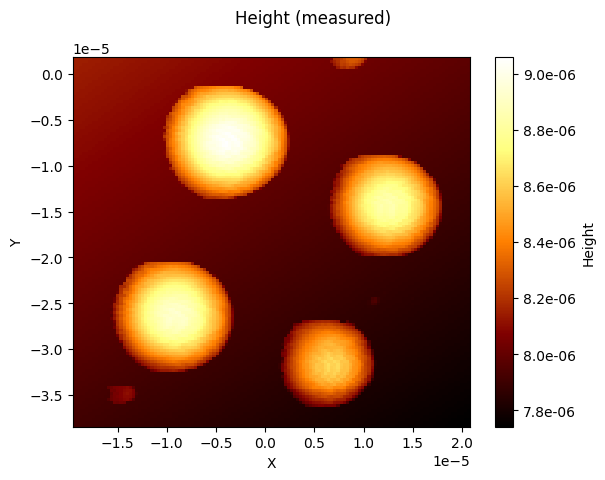

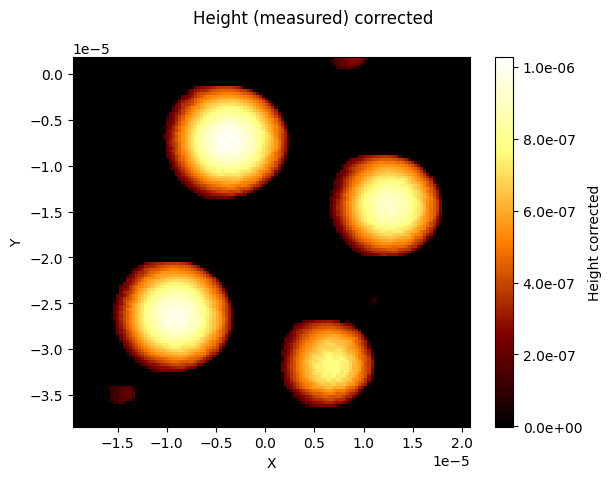

In [34]:
plt.close('all')
for img_file_path, output_path in zip(img_file_paths, output_paths):
    print('Image file:', img_file_path)
    print('Output folder:', output_path)
    afm_data, anal_data_h, fig_list =  wetting.get_afm_image(img_file_path, output_path, 
                                                             level_order=2, jump_tol=0.9)
    for fig in fig_list:
        display(fig)

plt.close('all')

## Get liquid drop properties

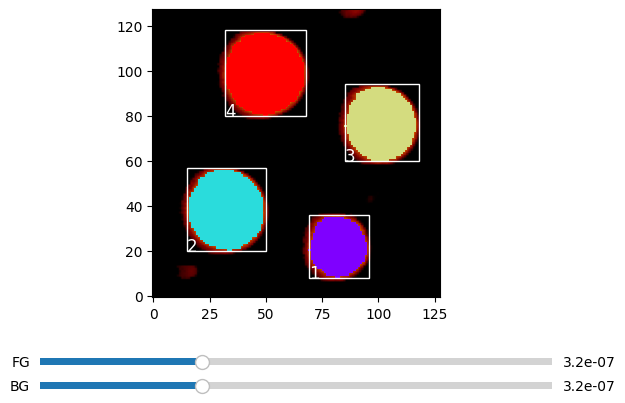

,Label,Curvature,Contact Radius,Max Height,Max Height raw,Volume,Volume raw,Drop contact angle,s,R/d,AFM file
0,1,0.000025,0.000006,7.436523e-07,8.002849e-07,4.334962e-17,3.176876e-17,13.954105,0.000002,8.171401,/home/pranav/Work/Data/AFM Surface Tension/202...
1,2,0.000026,0.000007,9.671029e-07,9.995578e-07,7.471369e-17,6.503990e-17,15.752683,0.000003,7.228535,/home/pranav/Work/Data/AFM Surface Tension/202...
2,3,0.000027,0.000007,8.851947e-07,9.386318e-07,6.535348e-17,5.316002e-17,14.754925,0.000002,7.723358,/home/pranav/Work/Data/AFM Surface Tension/202...
3,4,0.000027,0.000007,9.918215e-07,1.027269e-06,8.130442e-17,7.102692e-17,15.683781,0.000003,7.260694,/home/pranav/Work/Data/AFM Surface Tension/202...


In [35]:
plt.close('all')
#drop analysis of AFM data
drop_df, img_anal, fig_list = wetting.get_drop_prop(afm_data, anal_data_h, output_paths[0])
drop_df['AFM file'] = img_file_paths[0]
for fig in fig_list:
    display(fig)
display(drop_df)
plt.close('all')

## Analyze force distance curves

Force file: /home/pranav/Work/Data/AFM Surface Tension/20220912 mineral oil_mica_RFESPA_pegbrush/force-save_area3-2022.09.12-20.33.26.540.jpk-force
Force file: /home/pranav/Work/Data/AFM Surface Tension/20220912 mineral oil_mica_RFESPA_pegbrush/force-save_area3-2022.09.12-20.35.21.550.jpk-force
Force file: /home/pranav/Work/Data/AFM Surface Tension/20220912 mineral oil_mica_RFESPA_pegbrush/force-save_area3-2022.09.12-20.37.14.931.jpk-force
Force file: /home/pranav/Work/Data/AFM Surface Tension/20220912 mineral oil_mica_RFESPA_pegbrush/force-save_area3-2022.09.12-20.39.07.880.jpk-force


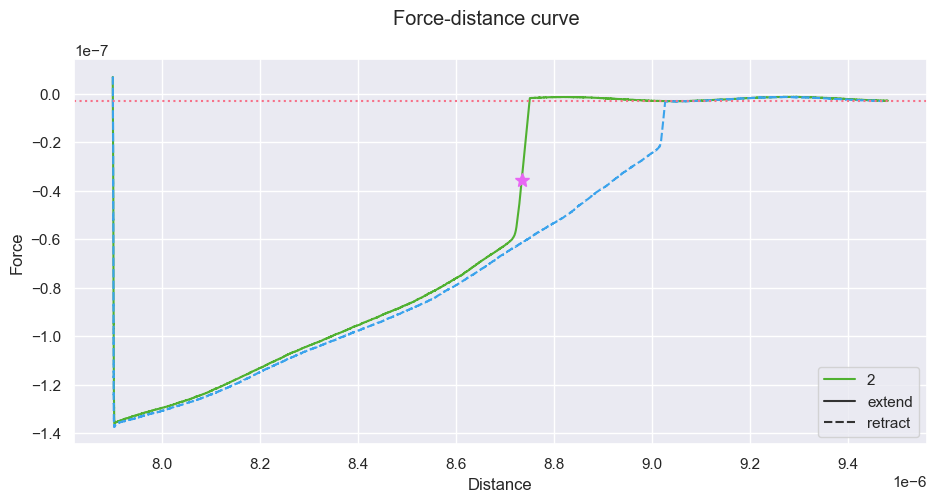

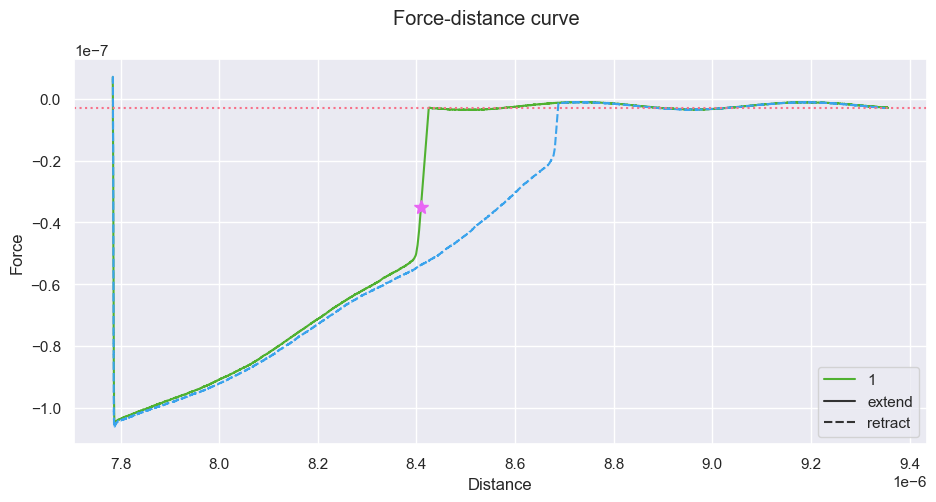

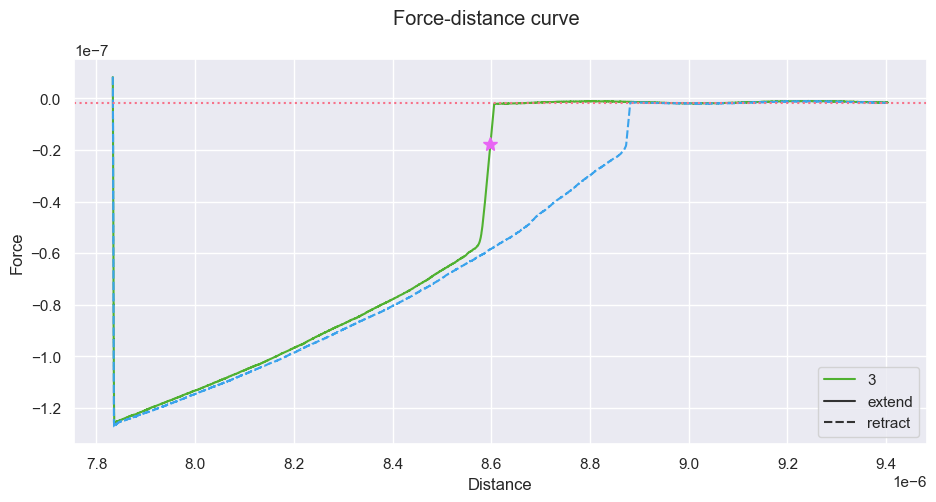

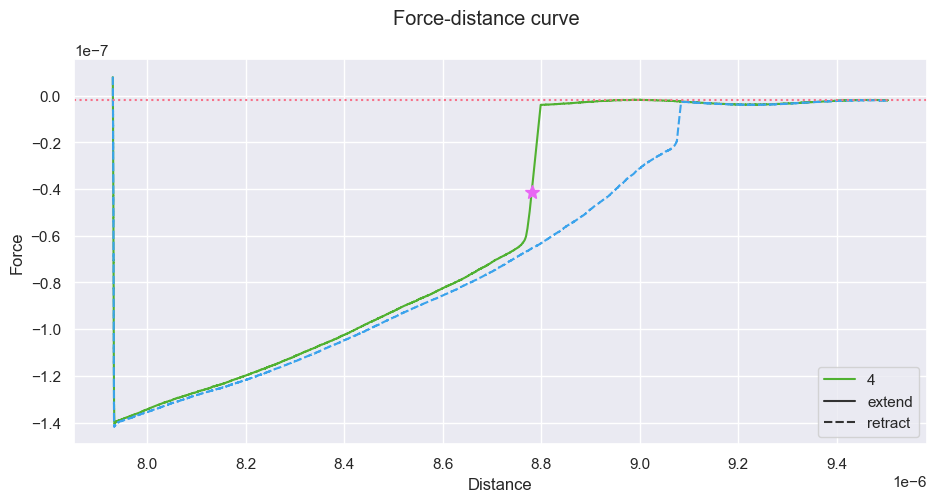

,Label,Adhesion (FD),Jumpin distance (FD),Slope (FD),Wetted length (FD),Fit distance (FD),Adhesion energy (FD),FD X position,FD Y position,FD file
0,2,1.331625e-07,8.348219e-07,0.095380,0.000001,0.000002,8.175899e-14,-0.000009,-0.000027,/home/pranav/Work/Data/AFM Surface Tension/202...
1,1,1.020489e-07,6.251728e-07,0.069847,0.000001,0.000002,4.791441e-14,0.000007,-0.000032,/home/pranav/Work/Data/AFM Surface Tension/202...
2,3,1.249597e-07,7.650900e-07,0.087759,0.000001,0.000002,6.964917e-14,0.000013,-0.000015,/home/pranav/Work/Data/AFM Surface Tension/202...
3,4,1.385110e-07,8.504859e-07,0.097317,0.000001,0.000002,8.636757e-14,-0.000004,-0.000008,/home/pranav/Work/Data/AFM Surface Tension/202...


In [36]:
plt.close('all')
fd_drop_df, fdfit_dict, fddata_dict, fig_list = wetting.analyze_drop_fd(fd_file_paths, afm_data, img_anal,
                                                                        force_cycle = 'approach', fit_order = 2,
                                                                        output_path = output_paths[0])

for fig in fig_list:
    #fig = Image(fig_path, width=400, height=400)
    display(fig)
display(fd_drop_df)

## Droplet surface tension calculation

In [37]:
#based on fixed AFM tip angle and contact angle 
plt.close('all')
plt.style.use('seaborn-bright')
contact_angle = 30 #Set fixed value to calculate its corresponsing surface tension
tip_angle_dict = {'Cone':17, 'Pyramid':20}
#transition_height = 700e-9
#combine droplet image and force result data
afm_df = drop_df.set_index('Label').join(fd_drop_df.set_index('Label'), how='right')

#calculate surface tension (from rupture distance)
output_df_cone = wetting.get_surface_tension(afm_df, simu_df,contact_angle,
                                             'Cone', tip_angle_dict['Cone'],
                                             fd_file_paths, output_paths[0], True)
output_df_pyramid = wetting.get_surface_tension(afm_df, simu_df,contact_angle,
                                                'Pyramid', tip_angle_dict['Pyramid'],
                                                fd_file_paths, output_paths[0], True)

Cone
Label
2    33.973676
1    32.422136
3    34.048636
4    34.406296
Name: Surface Tension FD (mN), dtype: float64
Pyramid
Label
2    16.480115
1    15.404475
3    16.325530
4    16.676654
Name: Surface Tension FD (mN), dtype: float64


/tmp/ipykernel_9015/2822996701.py:3: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



In [8]:
plt.close('all')
plt.style.use('seaborn-bright')
contact_angle = 30 #Set fixed value to calculate its corresponsing surface tension

#combine droplet image and force result data
afm_df = drop_df.set_index('Label').join(fd_drop_df.set_index('Label'), how='right')

#calculate surface tension (from rupture distance)
output_df = wetting.get_surface_tension3(afm_df, simu_df_anal,contact_angle,
                                          fd_file_paths, output_paths[0], True)

#output_df_filtered = output_df.dropna(subset=['FD file'])


# calculate surface tension from slopes of linear FD fitting
output_df2 = wetting.get_surface_tension2(afm_df, simu_df,
                                         tolerance=0.5,
                                         fd_file_paths=fd_file_paths,
                                         file_path=output_paths[0], save=True)
#output_df_filtered2 = output_df2[output_df['FD file'] != '']

# calculate surface tension by complete FD fitting using 2nd order poly approximation
output_df3, fig = wetting.get_surface_tension4(afm_df, simu_df, fdfit_dict,fddata_dict,
                                              file_path=output_paths[0], save=True)

ax = output_df.plot(x='Contact Radius', y=['Surface Tension (rupture, mN)','Surface Tension (fixed, mN)'],
                             marker = "o", ls="")
ax.plot(output_df2['Contact Radius'],output_df2['Surface Tension FD (mN)'],
        label="Surface Tension (slope, mN)", marker = "o", ls="")
ax.plot(output_df3['Contact Radius'],output_df3['Surface Tension (error min, mN)'],
        label="Surface Tension (polyfit, mN)", marker = "o", ls="")
ax.legend()

ax.ticklabel_format(axis='x', style='sci', scilimits=(-6,-6))
#show and save plot
fig1 = ax.get_figure()
display(fig1)
fig1.savefig(f'{output_paths[0]}/surface_tension.png', bbox_inches = 'tight',
             transparent = False)

plot_vars = ['Drop contact angle','Tip contact angle (rupture)',
             'Adhesion (FD)', 'Wetted length (FD)']
ax = output_df.plot(x='Contact Radius', y=plot_vars,title = plot_vars,
                             marker = "o", ls="", subplots=True, layout=(2,2), figsize=(11,10),
                             legend=False)
#number formatting
ax[1][0].ticklabel_format(axis='y', style='sci', scilimits=(-9,-9))
ax[1][1].ticklabel_format(axis='y', style='sci', scilimits=(-9,-9))
ax[1][1].ticklabel_format(axis='x', style='sci', scilimits=(-6,-6))
#show and save plot
fig2 = ax[0][0].get_figure()
display(fig2)
fig2.savefig(f'{output_paths[0]}/other_results.png', bbox_inches = 'tight',
             transparent = False)

display(output_df)
display(output_df2)
display(output_df3)
display(fig)
fig.savefig(f'{output_paths[0]}/polyfit_result.png', bbox_inches = 'tight',
            transparent = False)
plt.close('all')

/tmp/ipykernel_9162/1262319496.py:2: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



NameError: name 'simu_df_anal' is not defined

## Combine results from different folders

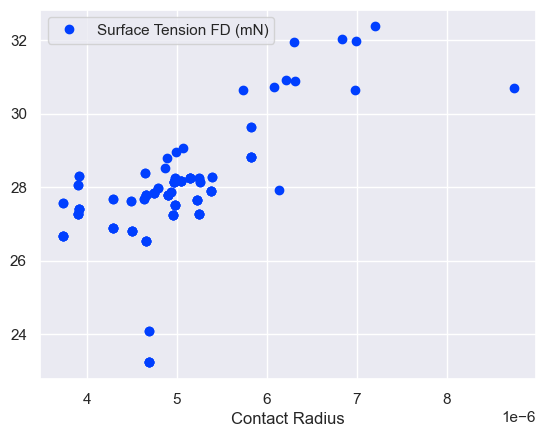

,Label,Curvature,Contact Radius,Max Height,Max Height raw,Volume,Volume raw,Drop contact angle,s,R/d,...,FD X position,FD Y position,FD file,Tip angle,F_fit,yd/F,Surface Tension FD (mN),Simulation contact angle,Folder name,File path
0,1,0.000010,0.000005,1.129625e-06,1.132029e-06,3.976865e-17,3.423997e-17,27.089862,0.000002,4.150957,...,0.000031,-0.000030,E:/Work/AFM/20220910 mineral oil_mica_RFESPA_p...,15,-0.596593,0.266773,23.228097,30,analysis,C:/Users/aranc/Desktop/Ranita/data for paper/2...
1,2,0.000012,0.000005,1.267849e-06,1.268971e-06,5.595219e-17,4.971641e-17,27.154965,0.000002,4.140624,...,0.000015,-0.000019,E:/Work/AFM/20220910 mineral oil_mica_RFESPA_p...,15,-0.596119,0.266985,27.270347,30,analysis,C:/Users/aranc/Desktop/Ranita/data for paper/2...
2,3,0.000010,0.000005,1.097636e-06,1.104541e-06,3.812218e-17,3.246266e-17,26.512106,0.000002,4.244838,...,0.000043,-0.000014,E:/Work/AFM/20220910 mineral oil_mica_RFESPA_p...,15,-0.600787,0.264911,26.535970,30,analysis,C:/Users/aranc/Desktop/Ranita/data for paper/2...
3,4,0.000012,0.000005,1.231684e-06,1.233543e-06,5.380340e-17,4.763145e-17,26.526822,0.000002,4.242397,...,0.000027,-0.000003,E:/Work/AFM/20220910 mineral oil_mica_RFESPA_p...,15,-0.600681,0.264958,27.656193,30,analysis,C:/Users/aranc/Desktop/Ranita/data for paper/2...
4,2,0.000017,0.000005,8.867802e-07,8.867489e-07,4.056837e-17,3.621710e-17,18.745951,0.000002,6.058242,...,-0.000006,-0.000035,E:/Work/AFM/20220910 mineral oil_mica_RFESPA_p...,15,-0.652100,0.244065,27.889762,30,analysis,C:/Users/aranc/Desktop/Ranita/data for paper/2...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,4,0.000014,0.000004,7.417557e-07,7.447675e-07,2.368843e-17,1.975953e-17,18.767056,0.000002,6.051307,...,-0.000015,-0.000026,E:/Work/AFM/20220910 mineral oil_mica_RFESPA_p...,15,-0.659668,0.241265,27.621803,30,save_area4-2022.09.10-15.21.12.450.jpk_results...,C:/Users/aranc/Desktop/Ranita/data for paper/2...
3,7,0.000015,0.000005,8.292707e-07,8.304973e-07,3.200639e-17,2.819318e-17,19.082420,0.000002,5.949474,...,-0.000010,-0.000013,E:/Work/AFM/20220910 mineral oil_mica_RFESPA_p...,15,-0.656653,0.242373,27.869771,30,save_area4-2022.09.10-15.21.12.450.jpk_results...,C:/Users/aranc/Desktop/Ranita/data for paper/2...
4,6,0.000013,0.000004,6.999905e-07,7.018641e-07,2.035803e-17,1.689900e-17,18.560332,0.000002,6.119919,...,0.000008,-0.000015,E:/Work/AFM/20220910 mineral oil_mica_RFESPA_p...,15,-0.661666,0.240537,27.688918,30,save_area4-2022.09.10-15.21.12.450.jpk_results...,C:/Users/aranc/Desktop/Ranita/data for paper/2...
5,8,0.000015,0.000005,8.256235e-07,8.290326e-07,3.240291e-17,2.841423e-17,18.842495,0.000002,6.026639,...,0.000016,-0.000009,E:/Work/AFM/20220910 mineral oil_mica_RFESPA_p...,15,-0.658943,0.241531,28.235952,30,save_area4-2022.09.10-15.21.12.450.jpk_results...,C:/Users/aranc/Desktop/Ranita/data for paper/2...


In [54]:
plt.cla()
plt.clf()
plt.close('all')
folder_paths = get_directories("Select analysis result folder (containing output Excel file)")
summary_df = wetting.combine_result_spreadsheets(folder_paths)
summary_df = summary_df[summary_df['FD file'] != '']

surf_ten_label = [#'Surface Tension (rupture, mN)', 
                  #'Surface Tension (fixed, mN)',
                  'Surface Tension FD (mN)', 
                  #'Surface Tension (error min, mN)'
                ]
#summary_df = summary_df[summary_df[surf_ten_label] != 0]
#summary_df.replace(0, np.nan, inplace=True)
timestamp = datetime.today().strftime('%y%m%d-%H%M%S')
summary_df.to_excel(f'{output_dir}/summary_data_all_{timestamp}.xlsx', index=None)

ax = summary_df.plot(x='Contact Radius', 
                     y=surf_ten_label,
                     marker = "o", ls="")

ax.ticklabel_format(axis='x', style='sci', scilimits=(-6,-6))
#show and save plot
fig3 = ax.get_figure()
fig3.savefig(f'{output_dir}/summary_plot_all_{timestamp}.png', bbox_inches = 'tight',
             transparent = False)
display(fig3)
display(summary_df)
plt.close('all')

## Combine multiple FD curves

In [84]:
plt.close('all')
# combine multiple fd curves
output_path = ''
fd_file_paths, _ = QFileDialog.getOpenFileNames()
wetting.combine_fd(fd_file_paths, zero_shift=True, 
                   output_dir=output_path,save=False)
#wetting.get_adhesion_from_fd(fd_file_paths)

Raw
Defl
ZSnsr


## Optional codes

In [ ]:
# calculate contact angle from fd curve
label = 5 #INPUT
label_df = drop_df[drop_df['Label']==label]
s = label_df['s'].iloc[0]
R = round(label_df['R/s'].iloc[0])
contact_angle = wetting.get_contact_angle(fd_file_paths[0], simu_df,
                                         R, s, fit_index=5000)

